# Finding if a Coin is Fair or Fake
We consider the folowing problem: Given a sequence of coin tosses $X = \{x^{(n)}\}_{n=1\dots N}$, determine if the coin is fair or fake.

This can be cast as a model selection problem:

\begin{eqnarray}
\pi_1|m & \sim & \left\{ \begin{array}{cc} \delta(\pi_1 - 0.5) & m = 0\\ \mathcal{B}(\pi; a, b) & m = 1 \end{array} \right.
\end{eqnarray}
For $n = 1\dots N$
\begin{eqnarray}
x^{(n)}| \pi_1 & \sim & \mathcal{BE}(x; \pi_1)
\end{eqnarray}

When m = 0, the coin is fair and m = 1, the coin is fake.

We need to calculate the marginal likelihoods for $m=0$ and $m=1$
\begin{eqnarray}
p(X| m) & = & \int d\pi_1 p(X | \pi_1) p(\pi_1|m)
\end{eqnarray}

###### Not Fake
$m=0$
\begin{eqnarray}
p(X| m = 0) & = & \int d\pi_1 p(X| \pi_1) \delta(\pi_1 - 0.5) \\
& = & \prod_{n=1}^N \left(\frac{1}{2}\right)^{x^{(n)}} \left(\frac{1}{2}\right)^{1-x^{(n)}} = \frac{1}{2^N}
\end{eqnarray}

###### Fake
$m=1$
\begin{eqnarray}
p(X| m = 1) & = & \int d\pi_1 p(\pi_1; a, b) \prod_{n=1}^{N} p(x^{(n)}| \pi_1)  \\
& = &  \int d\pi_1 \left(\prod_{n=1}^N \left(1-\pi_1\right)^{1-x^{(n)}} \pi_1^{x^{(n)}} \right) (0.5) \mathcal{B}(\pi_1; 20, 3) + (0.5) \mathcal{B}(\pi_1; 3, 20) \\
& = & \int d\pi_1 \left(\prod_{n=1}^N \left(1-\pi_1\right)^{1-x^{(n)}} \pi_1^{x^{(n)}} \right) (0.5) \mathcal{B}(\pi_1; 20, 3) + \int d\pi_1 \left(\prod_{n=1}^N \left(1-\pi_1\right)^{1-x^{(n)}} \pi_1^{x^{(n)}} \right) (0.5) \mathcal{B}(\pi_1; 3, 20) \\
& = & (0.5) \frac{\Gamma(20 + 3)}{\Gamma(20)\Gamma(3)} \int d\pi_1 \left(1-\pi_1\right)^{c_0+20-1} \pi_1^{c_1+3-1} + (0.5) \frac{\Gamma(3 + 20)}{\Gamma(3)\Gamma(20)} \int d\pi_1 \left(1-\pi_1\right)^{c_0+3-1} \pi_1^{c_1+20-1} \\
& = & (0.5) \frac{\Gamma(20 + 3)}{\Gamma(20)\Gamma(3)} \frac{\Gamma(c_0+20)\Gamma(c_1+3)}{\Gamma(c_0 + c_1 + 20 + 3)} + (0.5) \frac{\Gamma(3 + 20)}{\Gamma(3)\Gamma(20)} \frac{\Gamma(c_0+3)\Gamma(c_1+20)}{\Gamma(c_0 + c_1 + 3 + 20)} \\
& = & (0.5) \frac{\Gamma(23)}{\Gamma(20)\Gamma(3)} \Bigg\{ \frac{\Gamma(c_0+20)\Gamma(c_1+3)}{\Gamma(c_0 + c_1 + 23)} + \frac{\Gamma(c_0+3)\Gamma(c_1+20)}{\Gamma(c_0 + c_1 + 23)} \Bigg\} \\
\end{eqnarray}

The log-odds is the ratio of marginal likelihoods

$$
l(X) = \log\left( \frac{p(X|m = \text{Fair})}{p(X|m = \text{Fake})} \right)
$$

If $l(X)>0$, we may conclude that the coin is fair and biased when $l<0$.

In [57]:
# adapted from ModelingExamples.ipynb
import numpy as np
import scipy.special as sps

def log_odds(c_0, c_1, a, b):
    # Total number of tosses
    N = c_0 + c_1
    
    M_fair = N*np.log(0.5)
    M_fake = np.log(0.5 * (sps.gamma(a+b) / (sps.gamma(a) * sps.gamma(b))) * ((sps.gamma(c_0+a) * sps.gamma(c_1+b) / (sps.gamma(N+a+b)))  
                                                                    + (sps.gamma(c_0+b) * sps.gamma(c_1+a) / sps.gamma(N+a+b))))
    return M_fair - M_fake

# Number of Zeros observed
c_0 = 6
# Number of Ones
c_1 = 1

# Prior
a = 20
b = 3


print('log_odds = ', log_odds(c_0, c_1, a, b) )

('log_odds = ', -1.1364122558339171)


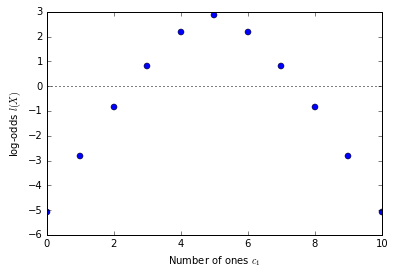

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt

a = 20
b = 3
N = 10

l = np.zeros(N+1)

for c in range(0,N+1):
    l[c] = log_odds(N-c, c, a, b)

plt.plot(range(0,N+1), l, 'o')
plt.plot(range(0,N+1), np.zeros(N+1), 'k:')
ax = plt.gca()
ax.set_xlabel('Number of ones $c_1$')
ax.set_ylabel('log-odds $l(X)$')
plt.show()

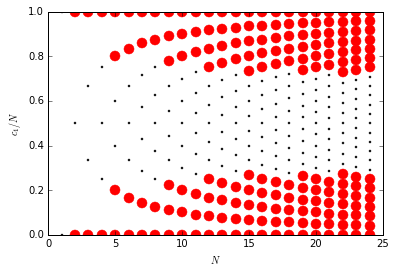

In [59]:
a = 20
b = 3

for N in range(1,25):

    l = np.zeros(N+1)

    for c in range(0,N+1):
        l[c] = log_odds(N-c, c, a, b)

    
    idx = np.where( np.array(l)<0 )
    p = np.arange(0,N+1)/float(N)
    plt.plot(N*np.ones_like(p), p, '.k',markersize=4)    
    plt.plot(N*np.ones_like(p[idx]), p[idx], '.r',markersize=20)
    

ax = plt.gca()
ax.set_ylim((0,1))
ax.set_xlabel('$N$')
ax.set_ylabel('$c_1/N$')
plt.show()

# Q74 from the booklet

Suppose we observe the following dataset $x_t \in 0,1$ for $t = 1 ... 50$

0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1

\begin{eqnarray} 
\pi_1 \sim \mathcal{B}(1, 1)
\end{eqnarray}
\begin{eqnarray}
\pi_2 \sim \mathcal{B}(1, 1)
\end{eqnarray}
\begin{eqnarray}
x_t & \sim & \left\{ \begin{array}{cc} \mathcal{BE}(x_t; \pi_1), & t < n \\  \mathcal{BE}(x_t; \pi_2), & t \geq n \end{array} \right.
\end{eqnarray}
Derive, compute and plot the posterior probability of $p(n|x_{1:50})$ given that $n$ is a-priori uniform.

$P(n=i|x_{1:50}) \propto \int_{\pi_{1}}\int_{\pi_{2}}P(x_{1:N},\pi_{1},\pi_{2},n) d\pi_{1} d\pi_{2}$

$\int_{\pi_{1}}\int_{\pi_{2}}P(x_{1:i}|\pi_{1},n=i) P(\pi_{1}) P(x_{i+1:N}|\pi_{2},n=i) P(\pi_{2}) P(n=i) d\pi_{1} d\pi_{2}$

$P(n=i)*\frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}*\frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}*\frac{\Gamma(a+c0_l)\Gamma(b+c1_l)}{\Gamma(a+b+c0_l+c1_l)}*\frac{\Gamma(a+c0_r)\Gamma(b+c1_r)}{\Gamma(a+b+c0_r+c1_r)}$

Where $c0_l$ and $c1_l$ represents the 0 and 1 count at left side t < n and $c0_r$ and $c1_r$ represents the 0 and 1 count at the right side t >= n

In [60]:
def anomalyDetection(seq, a, b):
    probs = []
    N = len(seq)
    for i in range(0, N):
        c0_l = 0
        c1_l = 0
        c0_r = 0
        c1_r = 0
        leftPart = seq[:i]
        rightPart = seq[i+1:]
        for m in leftPart:
            if m == 0:
                c0_l += 1
            else:
                c1_l += 1
        for m in rightPart:
            if m == 0:
                c0_r += 1
            else:
                c1_r += 1
        prob = (1.0/float(N))*((sps.gamma(a+b)/(sps.gamma(a) * sps.gamma(b)))**2) * ((sps.gamma(a+c0_l)*sps.gamma(b+c1_l))/(sps.gamma(a+b+c0_l+c1_l))) *((sps.gamma(a+c0_r)*sps.gamma(b+c1_r))/(sps.gamma(a+b+c0_r+c1_r)))
        probs.append(prob)
    #normalization    
    probs = np.multiply(probs,1/sum(probs))
    return probs

Index of change with max prob:  23


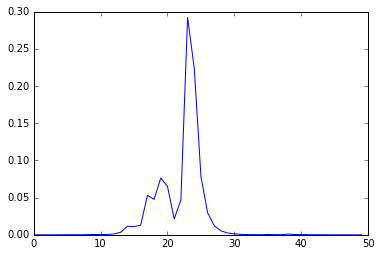

In [61]:
seq = [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
probs = anomalyDetection(seq, 1, 1)
print 'Index of change with max prob: ', np.argmax(probs)
plt.plot(probs)